<a href="https://colab.research.google.com/github/seanrote/neural_networks/blob/master/spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

In [3]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2023-12-11 23:12:54--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.06s   

2023-12-11 23:12:55 (7.99 MB/s) - ‘spam.csv’ saved [503663/503663]



In [4]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)

In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.columns = ['labels', 'data']

In [14]:
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1 })
Y = df['b_labels'].values

In [16]:
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size = 0.33)

In [17]:
#convert sentences to sequences
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [23]:
# get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 7234 unique tokens.


In [24]:
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

Shape of data train tensor: (3733, 189)


In [25]:
#seq length
T = data_train.shape[1]

In [26]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 189)


In [27]:
#create model

#embedding dimensionality
D= 20

#Hidden state dimensionality
M = 15

#Note: we acrtually want to the size of the embedding to (V + 1) X D,
#because the first index starts from 1 and not 0
#Thus, if the final index of the embedding matrix is V,
#then it actually must have a size V + 1

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i, x)


In [29]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

print('Training model...')
r = model.fit(
    data_train,
    Ytrain,
    epochs = 10,
    validation_data = (data_test, Ytest)
)

Training model...
Epoch 1/10
117/117 [==============================] - 16s 114ms/step - loss: 0.4980 - accuracy: 0.8486 - val_loss: 0.3754 - val_accuracy: 0.8673
Epoch 2/10
117/117 [==============================] - 14s 120ms/step - loss: 0.3406 - accuracy: 0.8653 - val_loss: 0.3189 - val_accuracy: 0.8673
Epoch 3/10
117/117 [==============================] - 13s 110ms/step - loss: 0.2959 - accuracy: 0.8653 - val_loss: 0.2765 - val_accuracy: 0.8673
Epoch 4/10
117/117 [==============================] - 13s 111ms/step - loss: 0.2483 - accuracy: 0.8653 - val_loss: 0.2306 - val_accuracy: 0.8673
Epoch 5/10
117/117 [==============================] - 20s 168ms/step - loss: 0.1956 - accuracy: 0.8658 - val_loss: 0.1867 - val_accuracy: 0.9130
Epoch 6/10
117/117 [==============================] - 26s 222ms/step - loss: 0.1478 - accuracy: 0.9812 - val_loss: 0.1418 - val_accuracy: 0.9869
Epoch 7/10
117/117 [==============================] - 21s 180ms/step - loss: 0.1099 - accuracy: 0.9979 - val_los

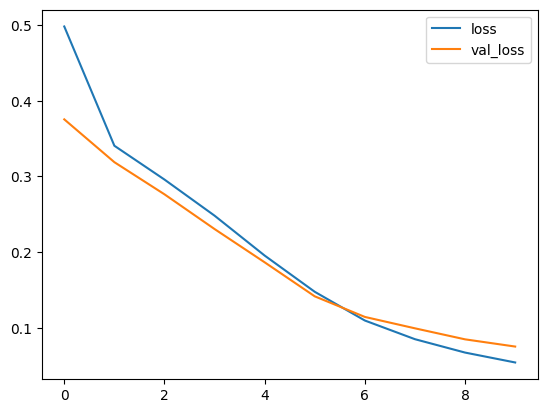

In [30]:
#loss plot
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

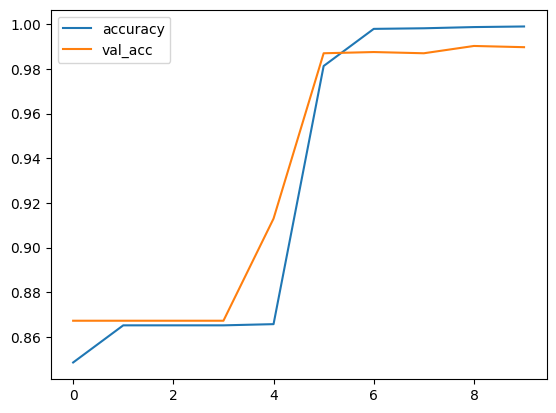

In [32]:
#plot accuracy
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()